In [65]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
banco = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', index_col=0)
banco

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,
1,25,1,49,4,1.6,1,0,0,1,0,0,0
2,45,19,34,3,1.5,1,0,0,1,0,0,0
3,39,15,11,1,1.0,1,0,0,0,0,0,0
4,35,9,100,1,2.7,2,0,0,0,0,0,0
5,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,2,0.3,3,0,0,0,0,0,0


In [ ]:
banco.Personal_Loan.replace([0,1],['Não','Sim'], inplace=True)

In [ ]:
banco.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
w = banco.iloc[:, :-5]
z = banco.iloc[:, 8:]
X = pd.concat([w, z], axis=1)
y = banco.iloc[:, 7]
y = pd.DataFrame(y)
y.head()

,Personal_Loan
ID,
1,Não
2,Não
3,Não
4,Não
5,Não


In [68]:
x_treino,x_teste,y_treino,y_teste = train_test_split(X,y,test_size=0.2,random_state=0)

In [69]:
lr = LogisticRegression()
lr.fit(x_treino,y_treino)

/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/valdir/anaconda3/envs/dnc/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
 #o modelo de forma inteligente já sabe , que a massa de dados em x_teste é para prever y
s = lr.predict(x_teste)
s = pd.DataFrame(s)
s

,0
0,Não
1,Não
2,Não
3,Não
4,Não
...,...
995,Não
996,Não
997,Não
998,Não


In [ ]:
modelo = x_teste.assign(Real=y_teste).assign(Predicao =  lr.predict(x_teste))

In [ ]:
modelo.Predicao.value_counts()

Não    936
Sim     64
Name: Predicao, dtype: int64

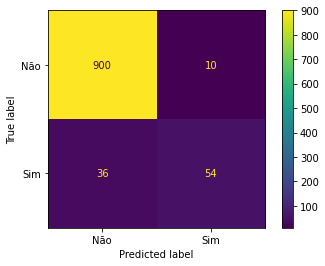

In [ ]:
from sklearn.metrics import pair_confusion_matrix, plot_confusion_matrix


plot_confusion_matrix(lr, x_teste, y_teste, values_format='d')

In [72]:
from sklearn.metrics import balanced_accuracy_score


print(f"Acurácia (Treino): {accuracy_score(y_treino, lr.predict(x_treino))}")
print(f"Acurácia (testee): {accuracy_score(y_teste, lr.predict(x_teste))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_treino, lr.predict(x_treino))}")
print(f"Acurácia Balanceada (testee): {balanced_accuracy_score(y_teste, lr.predict(x_teste))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_treino, lr.predict(x_treino))}")
print(f"Precision (testee): {precision_score(y_teste, lr.predict(x_teste))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_treino, lr.predict(x_treino))}")
print(f"Recall (testee): {recall_score(y_teste, lr.predict(x_teste))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_treino, lr.predict(x_treino))}")
print(f"F1-Score (testee): {f1_score(y_teste, lr.predict(x_teste))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_treino, lr.predict(x_treino)[:,1])}")
print(f"ROCAUC (testee): {roc_auc_score(y_teste, lr.predict_proba(x_teste)[:,1])}")

Acurácia (Treino): 0.9495
Acurácia (testee): 0.954
Acurácia Balanceada (Treino): 0.8016336387527523
Acurácia Balanceada (testee): 0.7945054945054946


ValueError: pos_label=1 is not a valid label. It should be one of ['Não', 'Sim']